<a href="https://colab.research.google.com/github/Keshav820/Code-Test/blob/main/Question_2_Assgn_2__RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Question 2(a)


In [ ]:
# Parameters
N = 30          # number of time periods
p_plus = 0.25   # probability of price increasing
p_minus = 0.25  # probability of price decreasing
x_max = 20      # maximum stock price
x0 = 10         # initial price
num_simulations = 10000  # number of simulations for mean/variance

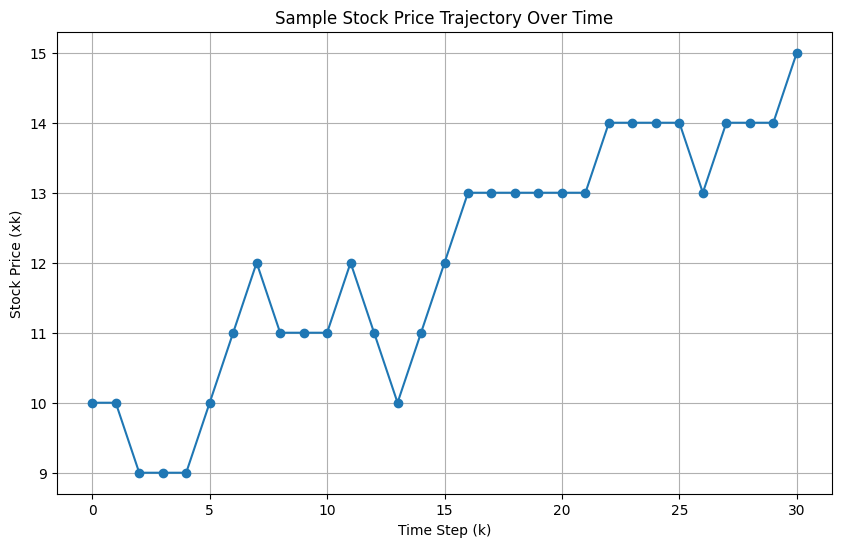

In [ ]:
# Function to simulate one stock price path
def simulate_stock_path():
    prices = [x0]
    xk = x0
    for _ in range(N):
        if xk == 0:
            move = np.random.choice([1, 0], p=[p_plus, 1 - p_plus])
            xk = move
        elif xk == x_max:
            move = np.random.choice([-1, 0], p=[p_minus, 1 - p_minus])
            xk = xk + move
        else:
            move = np.random.choice([1, 0, -1], p=[p_plus, 1 - p_plus - p_minus, p_minus])
            xk = xk + move
        prices.append(xk)
    return prices

# Simulate one path and plot
np.random.seed(42)  # for reproducibility
sample_path = simulate_stock_path()

plt.figure(figsize=(10, 6))
plt.plot(range(N+1), sample_path, marker='o')
plt.title("Sample Stock Price Trajectory Over Time")
plt.xlabel("Time Step (k)")
plt.ylabel("Stock Price (xk)")
plt.grid()
plt.show()



In [ ]:
# Simulate many paths to compute statistics
final_prices = []
for _ in range(num_simulations):
    path = simulate_stock_path()
    final_prices.append(path[-1])

# Compute mean and variance
mean_final_price = np.mean(final_prices)
variance_final_price = np.var(final_prices, ddof=1)

# 1% Confidence Interval
confidence_level = 0.99
z_score = norm.ppf(1 - (1 - confidence_level) / 2)  # 2-sided
margin_of_error = z_score * np.sqrt(variance_final_price / num_simulations)
confidence_interval = (mean_final_price - margin_of_error, mean_final_price + margin_of_error)

# Display results
print(f"Empirical Mean of Final Stock Price: {mean_final_price:.4f}")
print(f"Empirical Variance of Final Stock Price: {variance_final_price:.4f}")
print(f"1% Confidence Interval for Expected Final Price: {confidence_interval}")


Empirical Mean of Final Stock Price: 9.9925
Empirical Variance of Final Stock Price: 14.7999
1% Confidence Interval for Expected Final Price: (np.float64(9.89340612343154), np.float64(10.09159387656846))


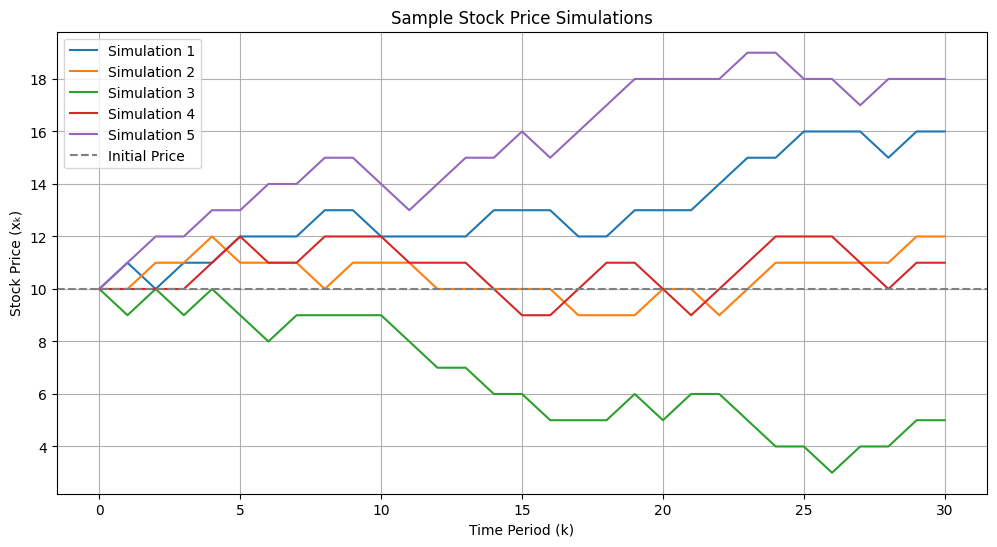

Mean final price: 9.9861
Variance of final prices: 14.5417
Standard deviation: 3.8134
99% Confidence Interval for expected price: (9.8879, 10.0843)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
N = 30          # Total time periods
p_plus = 0.25   # Probability of price increase
p_minus = 0.25  # Probability of price decrease
x_bar = 20      # Maximum price
x0 = 10         # Initial price
num_simulations = 10000  # Number of simulations for statistics

def simulate_price_series():
    """Simulate one price series from k=0 to k=N"""
    x = x0
    price_series = [x]

    for k in range(N):
        if x == 0:
            # Special case at lower boundary
            x = 1 if np.random.rand() < p_plus else 0
        elif x == x_bar:
            # Special case at upper boundary
            x = x_bar - 1 if np.random.rand() < p_minus else x_bar
        else:
            # Normal case
            r = np.random.rand()
            if r < p_plus:
                x += 1
            elif r < p_plus + p_minus:
                x -= 1
            # else x remains unchanged

        price_series.append(x)

    return price_series

# Run multiple simulations for statistics
all_simulations = [simulate_price_series() for _ in range(num_simulations)]
final_prices = [sim[-1] for sim in all_simulations]

# Calculate statistics
mean_price = np.mean(final_prices)
std_price = np.std(final_prices)
variance_price = std_price**2

# 1% confidence interval
z_score = norm.ppf(0.995)  # Two-tailed 1% (0.5% in each tail)
ci_lower = mean_price - z_score * std_price / np.sqrt(num_simulations)
ci_upper = mean_price + z_score * std_price / np.sqrt(num_simulations)

# Plot some sample price paths
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot first 5 simulations
    plt.plot(all_simulations[i], label=f'Simulation {i+1}')
plt.xlabel('Time Period (k)')
plt.ylabel('Stock Price (xₖ)')
plt.title('Sample Stock Price Simulations')
plt.axhline(y=x0, color='gray', linestyle='--', label='Initial Price')
plt.legend()
plt.grid(True)
plt.show()

# Print statistics
print(f"Mean final price: {mean_price:.4f}")
print(f"Variance of final prices: {variance_price:.4f}")
print(f"Standard deviation: {std_price:.4f}")
print(f"99% Confidence Interval for expected price: ({ci_lower:.4f}, {ci_upper:.4f})")

# Question 2(b)


In [ ]:
# Parameters
N = 30
p_plus = 0.25
p_minus = 0.25
x_max = 20
x0 = 10
beta = 1.2  # you can adjust beta > 1
threshold_price = beta * x0
num_episodes = 1000
gamma = 1.0  # No discounting
alpha = 0.1  # Learning rate

In [ ]:
states = list(range(x_max + 1))
actions = ['sell', 'wait']  # Action 0: sell, Action 1: wait

# Initialize Q-values for all state-action pairs
def initialize_Q():
    return {(state, action): 0.0 for state in states for action in actions}

In [ ]:
# Simulate one episode based on heuristic policy
def generate_episode():
    xk = x0
    trajectory = []
    sold = False
    for t in range(N):
        if sold:
            break
        if xk >= threshold_price:
            action = 'sell'
        else:
            action = 'wait'
        reward = 0
        if action == 'sell':
            reward = xk
            sold = True
        trajectory.append((xk, action, reward))
        if not sold:
            if xk == 0:
                xk = np.random.choice([1, 0], p=[p_plus, 1 - p_plus])
            elif xk == x_max:
                xk = np.random.choice([x_max-1, x_max], p=[p_minus, 1 - p_minus])
            else:
                move = np.random.choice([1, 0, -1], p=[p_plus, 1 - p_plus - p_minus, p_minus])
                xk += move
    if not sold:
        # forced to sell at time N
        trajectory.append((xk, 'sell', xk))
    return trajectory


In [ ]:
# Monte Carlo Update
def monte_carlo(Q, trajectory):
    G = 0
    for (state, action, reward) in reversed(trajectory):
        G = gamma * G + reward
        if not any((s == state and a == action) for (s, a, _) in trajectory[:-1]):
            Q[(state, action)] += alpha * (G - Q[(state, action)])
    return Q

In [ ]:
# TD(lambda) Update
def td_lambda(Q, trajectory, lambd):
    E = {(state, action): 0.0 for state in states for action in actions}
    G = 0
    for i, (state, action, reward) in enumerate(trajectory):
        next_state, next_action = (trajectory[i+1][0], trajectory[i+1][1]) if i+1 < len(trajectory) else (None, None)
        td_target = reward
        if next_state is not None:
            td_target += gamma * Q[(next_state, next_action)]
        td_error = td_target - Q[(state, action)]
        E[(state, action)] += 1  # accumulating traces
        for key in Q.keys():
            Q[key] += alpha * td_error * E[key]
            E[key] *= gamma * lambd
    return Q

In [ ]:
# Monte Carlo
Q_MC = initialize_Q()

for _ in range(num_episodes):
    episode = generate_episode()
    Q_MC = monte_carlo(Q_MC, episode)

# TD(λ) for λ = 0, 0.3, 0.8
Q_TD_0 = initialize_Q()
Q_TD_03 = initialize_Q()
Q_TD_08 = initialize_Q()

for _ in range(num_episodes):
    episode = generate_episode()
    Q_TD_0 = td_lambda(Q_TD_0, episode, lambd=0.0)
    Q_TD_03 = td_lambda(Q_TD_03, episode, lambd=0.3)
    Q_TD_08 = td_lambda(Q_TD_08, episode, lambd=0.8)

# Print State Values
def print_state_values(Q, method_name):
    print(f"\nState Values ({method_name}):")
    for state in range(x_max + 1):
        v = max(Q[(state, 'sell')], Q[(state, 'wait')])
        print(f"State {state}: {v:.2f}")

print_state_values(Q_MC, "Monte Carlo")
print_state_values(Q_TD_0, "TD(λ=0)")
print_state_values(Q_TD_03, "TD(λ=0.3)")
print_state_values(Q_TD_08, "TD(λ=0.8)")


State Values (Monte Carlo):
State 0: 0.00
State 1: 0.47
State 2: 0.82
State 3: 2.86
State 4: 3.83
State 5: 4.87
State 6: 5.91
State 7: 6.92
State 8: 7.98
State 9: 8.95
State 10: 9.93
State 11: 10.48
State 12: 12.00
State 13: 0.00
State 14: 0.00
State 15: 0.00
State 16: 0.00
State 17: 0.00
State 18: 0.00
State 19: 0.00
State 20: 0.00

State Values (TD(λ=0)):
State 0: 0.11
State 1: 0.58
State 2: 1.76
State 3: 2.70
State 4: 3.77
State 5: 4.81
State 6: 5.90
State 7: 6.99
State 8: 8.00
State 9: 8.95
State 10: 9.96
State 11: 10.68
State 12: 12.00
State 13: 0.00
State 14: 0.00
State 15: 0.00
State 16: 0.00
State 17: 0.00
State 18: 0.00
State 19: 0.00
State 20: 0.00

State Values (TD(λ=0.3)):
State 0: 0.24
State 1: 0.88
State 2: 1.76
State 3: 2.70
State 4: 3.77
State 5: 4.81
State 6: 5.90
State 7: 6.99
State 8: 8.00
State 9: 8.95
State 10: 9.96
State 11: 10.66
State 12: 12.00
State 13: 0.00
State 14: 0.00
State 15: 0.00
State 16: 0.00
State 17: 0.00
State 18: 0.00
State 19: 0.00
State 20: 0.0